In [77]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [73]:
digits = load_digits()

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

image_dict = {0: digits.images[0].reshape(8,8), 1: digits.images[1].reshape(8,8), 2: digits.images[2].reshape(8,8), 
              3: digits.images[3].reshape(8,8), 4: digits.images[4].reshape(8,8), 5: digits.images[5].reshape(8,8),
              6: digits.images[6].reshape(8,8), 7: digits.images[7].reshape(8,8), 8: digits.images[8].reshape(8,8),
              9: digits.images[9].reshape(8,8)}

Time taken to train the Numpy model: 1.4239449501037598 seconds


Text(0.5, 1.0, 'Model Accuracy')

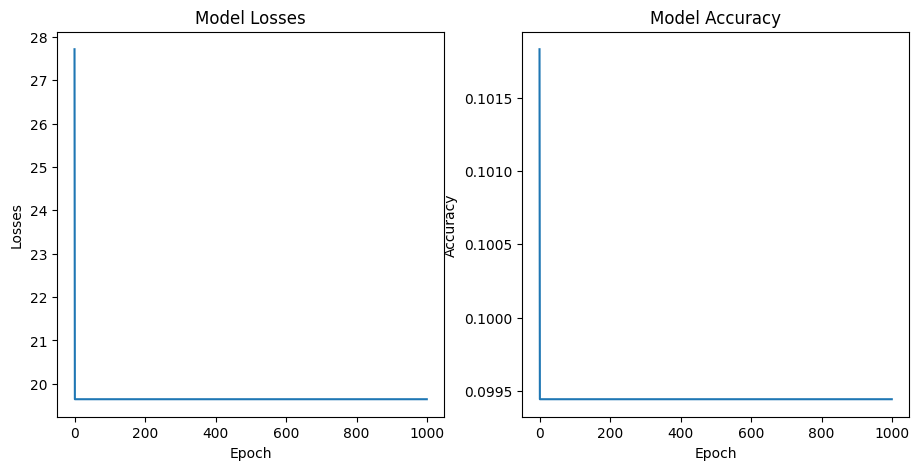

In [84]:
X = digits.data / 16.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, test_size=0.3)

# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 16
output_size = len(np.unique(y_train))

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)


# Train the model
loss_tracker = []
accuracy_list = []
learning_rate = 0.1
num_epochs = 1000

start_time = time.time()

for epoch in range(num_epochs):
    # Forward pass
    hidden_layer = tanh(np.dot(X_train, W1))
    output_layer = tanh(np.dot(hidden_layer, W2))

    loss_tracker.append(np.mean((output_layer - y_train.reshape(-1,1))**2))

    accuracy_list.append(np.mean(np.argmax(output_layer, axis=1) == y_train))

    # Backward pass
    output_layer_error = output_layer - y_train.reshape(-1, 1)
    output_layer_change = output_layer_error * tanh_derivative(output_layer)
    hidden_layer_error = np.dot(output_layer_change, W2.T)
    hidden_layer_change = hidden_layer_error * tanh_derivative(hidden_layer)

    # Update the weights
    W2 -= learning_rate * np.dot(hidden_layer.T, output_layer_change)
    W1 -= learning_rate * np.dot(X_train.T, hidden_layer_change)

end_time = time.time()

# Test the model
hidden_layer = tanh(np.dot(X_test, W1))
output_layer = tanh(np.dot(hidden_layer, W2))
predictions = np.argmax(output_layer, axis=1)

print('Time taken to train the Numpy model:', end_time - start_time, 'seconds')
# Plot
fig = plt.figure(figsize=(11, 5))
plt.subplot(1,2,1) 
plt.plot(loss_tracker)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.title('Model Losses')

plt.subplot(1,2,2)
plt.plot(accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')



Predicted digit: 0
Predicted digit: 0
Predicted digit: 0


Text(0.5, 0.98, 'Model Predction Capabilites')

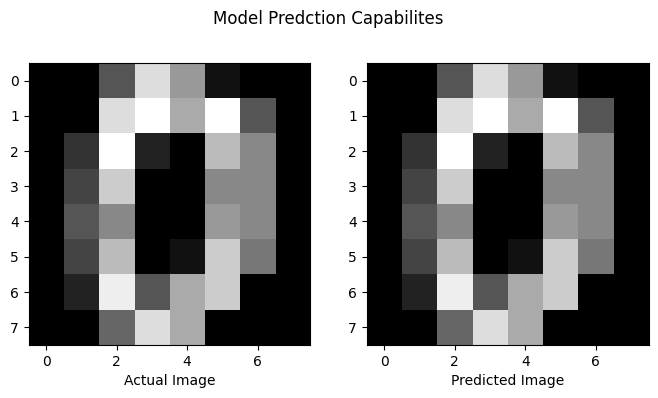

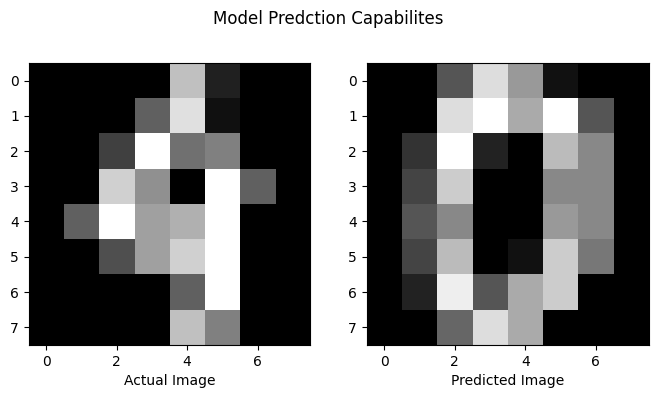

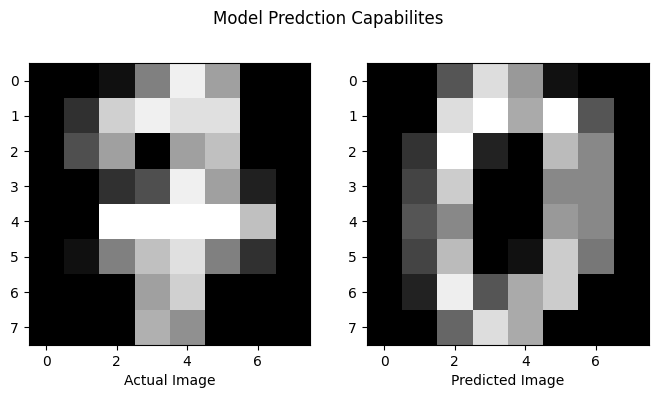

In [37]:
test_image = digits.images[0]

# Preprocess the image (normalize and reshape)
test_image /= 16.0  # normalize
test_image = test_image.reshape(1, -1)  # reshape to a 1D array

# Classify the image using the trained model
hidden_layer = tanh(np.dot(test_image, W1))
output_layer = tanh(np.dot(hidden_layer, W2))
predicted_digit = np.argmax(output_layer)

predicted_image = image_dict[predicted_digit]
# Print the predicted digit
print("Predicted digit:", predicted_digit)


fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.xlabel('Actual Image')
plt.subplot(1,2,2)
plt.imshow(predicted_image, cmap='gray')
plt.xlabel('Predicted Image')
plt.suptitle('Model Predction Capabilites')

test_image = digits.images[24]

# Preprocess the image (normalize and reshape)
test_image /= 16.0  # normalize
test_image = test_image.reshape(1, -1)  # reshape to a 1D array

# Classify the image using the trained model
hidden_layer = tanh(np.dot(test_image, W1))
output_layer = tanh(np.dot(hidden_layer, W2))
predicted_digit = np.argmax(output_layer)

predicted_image = image_dict[predicted_digit]
# Print the predicted digit
print("Predicted digit:", predicted_digit)


fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.xlabel('Actual Image')
plt.subplot(1,2,2)
plt.imshow(predicted_image, cmap='gray')
plt.xlabel('Predicted Image')
plt.suptitle('Model Predction Capabilites')

test_image = digits.images[17]

# Preprocess the image (normalize and reshape)
test_image /= 16.0  # normalize
test_image = test_image.reshape(1, -1)  # reshape to a 1D array

# Classify the image using the trained model
hidden_layer = tanh(np.dot(test_image, W1))
output_layer = tanh(np.dot(hidden_layer, W2))
predicted_digit = np.argmax(output_layer)

predicted_image = image_dict[predicted_digit]
# Print the predicted digit
print("Predicted digit:", predicted_digit)


fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.xlabel('Actual Image')
plt.subplot(1,2,2)
plt.imshow(predicted_image, cmap='gray')
plt.xlabel('Predicted Image')
plt.suptitle('Model Predction Capabilites')


Time taken to train the Numpy model: 5.184415102005005 seconds


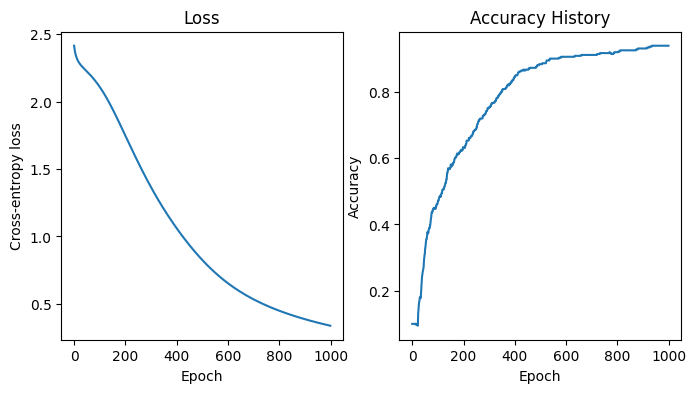

In [80]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=100)

# Normalize the input data
X_train = X_train / 16.0
X_test = X_test / 16.0

# Define the neural network architecture
input_size = X_train.shape[1] # 64 (8x8 image)
hidden_size1 = 32
hidden_size2 = 16
output_size = len(np.unique(y_train)) # 10 (0-9 digits)

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
b1 = np.zeros(hidden_size1)
W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
b2 = np.zeros(hidden_size2)
W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
b3 = np.zeros(output_size)

# Define the forward pass function
def forward(X):
    # First hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)

    # Second hidden layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Output layer
    z3 = np.dot(a2, W3) + b3
    exp_z3 = np.exp(z3)
    probs = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)

    return probs

# Define the cross-entropy loss function
def cross_entropy_loss(probs, y):
    N = len(y)
    log_probs = -np.log(probs[range(N), y])
    loss = np.sum(log_probs) / N
    return loss

# Define the backward pass function
def backward(X, y, probs):
    N = len(y)
    d3 = probs
    d3[range(N), y] -= 1
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    dW3 = np.dot(a2.T, d3) / N
    db3 = np.sum(d3, axis=0) / N

    da2 = np.dot(d3, W3.T)
    dz2 = da2 * (a2 * (1 - a2))
    dW2 = np.dot(a1.T, dz2) / N
    db2 = np.sum(dz2, axis=0) / N

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (1 - a1 ** 2)
    dW1 = np.dot(X.T, dz1) / N
    db1 = np.sum(dz1, axis=0) / N

    return dW1, db1, dW2, db2, dW3, db3

loss_list = []
accuracy_list = []
learning_rate = 0.1
epochs = 1000

start_time = time.time()
for i in range(epochs):
    probs = forward(X_train)
    loss = cross_entropy_loss(probs, y_train)
    loss_list.append(loss)

    # Backward pass
    dW1, db1, dW2, db2, dW3, db3 = backward(X_train, y_train, probs)

    # Update the weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
   
    probs = forward(X_test)
    predictions = np.argmax(probs, axis=1)
    accuracy = np.mean(predictions == y_test)
    accuracy_list.append(accuracy)

end_time = time.time()

print('Time taken to train the Numpy model:', end_time - start_time, 'seconds')
# Plot the loss over time
fig = plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.plot(loss_list)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")

plt.subplot(1,2,2)
plt.plot(range(num_epochs), accuracy_list)
plt.title("Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Actual Digit: 3
Predicted Digit: 3


Text(0.5, 0.98, 'Model Predction Capabilites')

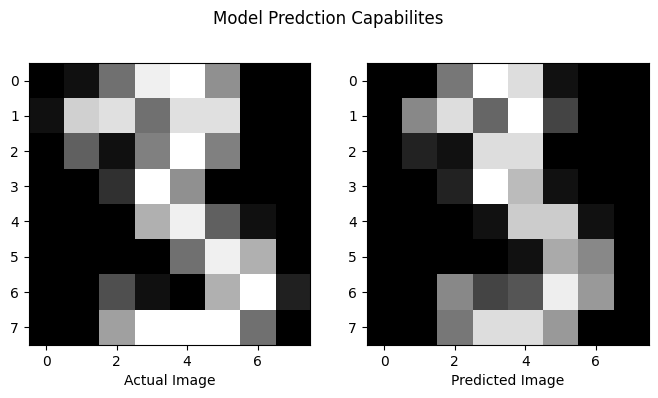

In [76]:
num1 = random.randint(0, 1796)

test_image = digits.images[num1]

# Classify the image using the trained model
probs = forward(test_image.reshape(1,-1))
predicted_label = np.argmax(probs)
predicted_image = image_dict[predicted_label]

print("Actual Digit:", digits.target[num1])
print("Predicted Digit:", predicted_label)

fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.xlabel('Actual Image')
plt.subplot(1,2,2)
plt.imshow(predicted_image, cmap='gray')
plt.xlabel('Predicted Image')
plt.suptitle('Model Predction Capabilites')
